In [0]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)

In [0]:
data = pd.read_csv('ghg_pluto.csv')
data.head(3)

,Unnamed: 0,BBL,GHG change,Borough,Self-Reported Gross Floor Area (ft²),Largest Property Use Type,Year Built,ENERGY STAR Score,Occupancy,Census Tract,bbl,latitude,longitude,borough,ct2010,bldgclass,landuse,bldgarea,numfloors,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,assessland,assesstot,builtfar
0,0,3087210375,-0.140623,Brooklyn,"289,000",Multifamily Housing,"1,959",87,100,"61,002",3087210375,40.575970,-73.955935,BK,610.02,D4,3.0,288548.0,16.0,0.0,288548.0,0.0,0.0,0.0,0.0,0.0,589050.0,9207450.0,6.44
1,1,3008640001,-0.110197,Brooklyn,"52,990",Worship Facility,"1,931",1,100,102,3008640001,40.639116,-74.014755,BK,102.00,M1,8.0,353342.0,3.0,353342.0,0.0,353342.0,0.0,0.0,0.0,0.0,1228500.0,17724150.0,2.52
2,2,1013110040,-0.109324,Manhattan,"320,585",Office,"1,977",50,100,"11,203",1013110040,40.760198,-73.968094,MN,112.03,O4,5.0,313200.0,32.0,313200.0,0.0,307822.0,5378.0,0.0,0.0,0.0,9270000.0,48551850.0,25.70


In [0]:
########################################################
## 1. Drop the rows where GHG change is null or infinity
########################################################
data = data.replace([np.inf, -np.inf], np.nan).dropna(subset=["GHG change"], how="all")

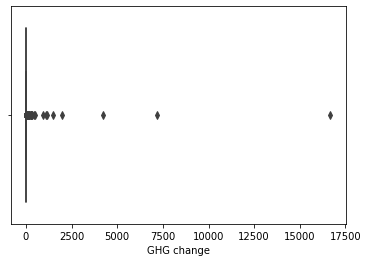

In [0]:
########################################################
## 2. Visualize the GHG change and remove outliers
########################################################
sns.boxplot(x=data['GHG change'])

(array([ 43.,  53.,  52.,  43.,  42.,  33.,  46.,  35.,  35.,  23.,  30.,
         29.,  35.,  34.,  45.,  36.,  39.,  46.,  38.,  65.,  42.,  50.,
         70.,  58.,  80.,  72.,  81., 104., 107., 135., 119., 136., 143.,
        168., 159., 207., 211., 206., 207., 268., 361., 274., 244., 249.,
        276., 300., 298., 343., 306., 345., 326., 308., 279., 284., 253.,
        250., 227., 208., 171., 160., 140., 144., 116.,  82.,  95.,  94.,
         79.,  82.,  64.,  70.,  72.,  74.,  53.,  62.,  83.,  44.,  42.,
         35.,  37.,  33.,  38.,  39.,  30.,  21.,  27.,  23.,  26.,  29.,
         27.,  27.,  22.,  17.,  22.,  15.,  19.,  17.,  21.,  24.,  14.,
         23.]),
 array([-0.8  , -0.784, -0.768, -0.752, -0.736, -0.72 , -0.704, -0.688,
        -0.672, -0.656, -0.64 , -0.624, -0.608, -0.592, -0.576, -0.56 ,
        -0.544, -0.528, -0.512, -0.496, -0.48 , -0.464, -0.448, -0.432,
        -0.416, -0.4  , -0.384, -0.368, -0.352, -0.336, -0.32 , -0.304,
        -0.288, -0.272, -0.256

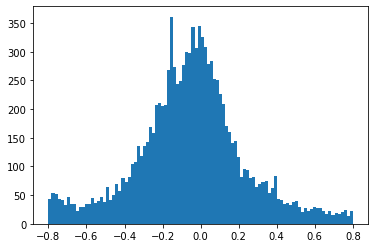

In [0]:
plt.hist(data['GHG change'],range=[-0.8,0.8],bins=100)

In [0]:
### select buildings whose GHG emssions change between -0.8 to 0.8
data = data[(data['GHG change']<0.8) & (data['GHG change']>-0.8)]

In [0]:
len(data)

10869

In [0]:
########################################################
## 3. label y variables according to their GHG change
##    2 -- GHG decreases more than 15%
##    1 -- GHG decreases less than 15%
##    0 -- GHG increases
########################################################
def helper(x):
    if x < -0.15:
        return 2
    elif x < 0:
        return 1
    return 0
data.loc[:, 'GHG'] = data['GHG change'].apply(lambda x: helper(x))

In [0]:
data['GHG'].value_counts()

0    4448
2    3654
1    2767
Name: GHG, dtype: int64

In [0]:
data['GHG'].to_csv('Y.csv')

(array([1.222e+03, 7.500e+01, 1.600e+01, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  1.  ,  22.75,  44.5 ,  66.25,  88.  , 109.75, 131.5 , 153.25,
        175.  , 196.75, 218.5 , 240.25, 262.  , 283.75, 305.5 , 327.25,
        349.  , 370.75, 392.5 , 414.25, 436.  ]),
 <a list of 20 Patch objects>)

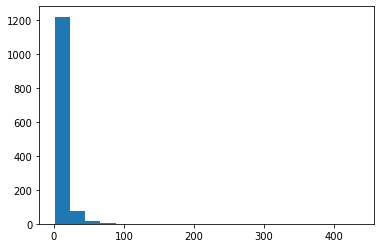

In [0]:
########################################################
## 4. see the distribution of census tract 
########################################################
census_count = data.groupby(["borough", "ct2010"]).size().reset_index(name="count")
plt.hist(census_count['count'],bins=20)

In [0]:
census_count['count'].describe()

count    1318.000000
mean        8.240516
std        18.129894
min         1.000000
25%         2.000000
50%         4.000000
75%         9.000000
max       436.000000
Name: count, dtype: float64

In [0]:
########################################################
## 4. normalize all variables
########################################################
X = data[['Self-Reported Gross Floor Area (ft²)',
 'Largest Property Use Type',
 'Year Built',
 'ENERGY STAR Score',
 'Occupancy',
 'bldgclass',
 'landuse',
 'bldgarea',
 'numfloors',
 'comarea',
 'resarea',
 'officearea',
 'retailarea',
 'garagearea',
 'strgearea',
 'factryarea',
 'assessland',
 'assesstot',
 'builtfar']]

In [0]:
X['strgearea'] = X['strgearea'].fillna((X['strgearea'].mean()))
X['garagearea'] = X['garagearea'].fillna((X['garagearea'].mean()))
X['comarea'] = X['comarea'].fillna((X['comarea'].mean()))
X['resarea'] = X['resarea'].fillna((X['resarea'].mean()))
X['officearea'] = X['officearea'].fillna((X['officearea'].mean()))
X['retailarea'] = X['retailarea'].fillna((X['retailarea'].mean()))
X['factryarea'] = X['factryarea'].fillna((X['factryarea'].mean()))
X['builtfar'] = X['builtfar'].fillna((X['builtfar'].mean()))
##X_train_original['unitstotal'] = X_train_original['unitstotal'].fillna((X_train_original['unitstotal'].mean()))
##X_train_original['unitsres'] = X_train_original['unitsres'].fillna((X_train_original['unitsres'].mean()))

In [0]:
X = X.dropna()

In [0]:
X.shape

(10868, 19)

In [0]:
pd.isna(X).sum(axis=0)

Self-Reported Gross Floor Area (ft²)    0
Largest Property Use Type               0
Year Built                              0
ENERGY STAR Score                       0
Occupancy                               0
bldgclass                               0
landuse                                 0
bldgarea                                0
numfloors                               0
comarea                                 0
resarea                                 0
officearea                              0
retailarea                              0
garagearea                              0
strgearea                               0
factryarea                              0
assessland                              0
assesstot                               0
builtfar                                0
dtype: int64

In [0]:
X['Self-Reported Gross Floor Area (ft²)'] = X['Self-Reported Gross Floor Area (ft²)'].str.replace(',','').astype(float)
X['landuse'] = X['landuse'].astype(str)

In [0]:
#### area as percentage
cols = ['comarea', 'resarea', 'officearea',
       'retailarea', 'garagearea', 'strgearea', 'factryarea']
for c in cols:
    #X.loc[:, c] = round(X[c] /  X['bldgarea'],3)
    X.loc[:, c] = X.apply(lambda x: x[c] / x['bldgarea'] if x['bldgarea'] != 0 else 0, axis=1)

In [0]:
X.describe()

,Self-Reported Gross Floor Area (ft²),Occupancy,bldgarea,numfloors,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,assessland,assesstot,builtfar
count,1.086800e+04,10868.000000,1.086800e+04,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,1.086800e+04,1.086800e+04,10868.000000
mean,1.587478e+05,99.103791,2.429882e+05,10.483208,0.244084,0.769325,0.120936,0.036731,0.014598,0.012751,0.014595,4.213958e+06,2.099812e+07,6.336892
std,2.705322e+05,5.659106,4.920217e+05,9.055798,0.395923,0.441301,0.293938,0.113777,0.064929,0.098346,0.112016,1.173586e+07,4.958667e+07,5.545265
min,2.350000e+03,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,6.270000e+04,100.000000,6.675400e+04,6.000000,0.000000,0.789902,0.000000,0.000000,0.000000,0.000000,0.000000,3.231000e+05,2.766825e+06,2.810000
50%,9.065500e+04,100.000000,1.030320e+05,6.000000,0.028456,0.975150,0.000000,0.000000,0.000000,0.000000,0.000000,1.020600e+06,7.231050e+06,4.430000
75%,1.615085e+05,100.000000,1.827738e+05,13.000000,0.208949,1.000000,0.008602,0.033958,0.000000,0.000000,0.000000,3.150000e+06,1.705365e+07,9.062500
max,1.343508e+07,100.000000,1.343508e+07,102.000000,4.062315,9.837248,3.083646,1.000000,1.000000,1.000000,1.000000,1.970424e+08,8.225000e+08,88.550000


In [0]:
from sklearn import preprocessing
column_names = ['Self-Reported Gross Floor Area (ft²)','Occupancy','bldgarea', 
                'numfloors', 'comarea', 'resarea', 'officearea','retailarea', 
                'garagearea', 'strgearea', 'factryarea', 'assessland','assesstot', 'builtfar']
x = X[column_names].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_train_normal = pd.DataFrame(x_scaled, columns=column_names, index = X.index)

In [0]:
X_train_normal.describe()

,Self-Reported Gross Floor Area (ft²),Occupancy,bldgarea,numfloors,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,assessland,assesstot,builtfar
count,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000
mean,0.011643,0.991038,0.018086,0.102777,0.060085,0.078205,0.039219,0.036731,0.014598,0.012751,0.014595,0.021386,0.025530,0.071563
std,0.020140,0.056591,0.036622,0.088782,0.097463,0.044860,0.095321,0.113777,0.064929,0.098346,0.112016,0.059560,0.060288,0.062623
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.004493,1.000000,0.004969,0.058824,0.000000,0.080297,0.000000,0.000000,0.000000,0.000000,0.000000,0.001640,0.003364,0.031733
50%,0.006574,1.000000,0.007669,0.058824,0.007005,0.099128,0.000000,0.000000,0.000000,0.000000,0.000000,0.005180,0.008792,0.050028
75%,0.011849,1.000000,0.013604,0.127451,0.051436,0.101654,0.002789,0.033958,0.000000,0.000000,0.000000,0.015986,0.020734,0.102343
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
### select columns that are not numbers
X_not_num = X.select_dtypes(include=['object']).columns.to_list()

In [0]:
X_not_num

['Largest Property Use Type',
 'Year Built',
 'ENERGY STAR Score',
 'bldgclass',
 'landuse']

In [0]:
X = X[X_not_num].merge(X_train_normal,left_index=True, right_index=True)

In [0]:
X

,Largest Property Use Type,Year Built,ENERGY STAR Score,bldgclass,landuse,Self-Reported Gross Floor Area (ft²),Occupancy,bldgarea,numfloors,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,assessland,assesstot,builtfar
0,Multifamily Housing,"1,959",87,D4,3.0,0.021340,1.00,0.021477,0.156863,0.000000,0.101654,0.000000,0.000000,0.000000,0.0,0.000000,0.002989,0.011194,0.072727
1,Worship Facility,"1,931",1,M1,8.0,0.003770,1.00,0.026300,0.029412,0.246165,0.000000,0.324291,0.000000,0.000000,0.0,0.000000,0.006235,0.021549,0.028458
2,Office,"1,977",50,O4,5.0,0.023691,1.00,0.023312,0.313725,0.246165,0.000000,0.318723,0.017171,0.000000,0.0,0.000000,0.047046,0.059030,0.290232
3,Manufacturing/Industrial Plant,"1,994",Not Available,F2,6.0,0.040819,1.00,0.033010,0.029412,0.246165,0.000000,0.136856,0.000000,0.000000,0.0,0.577983,0.055598,0.029931,0.004065
4,Office,"1,998",33,O4,5.0,0.065571,1.00,0.063639,0.313725,0.246165,0.000000,0.313711,0.032626,0.000000,0.0,0.000000,0.097517,0.286930,0.325918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13701,Financial Office,"1,961",Not Available,O4,5.0,0.118034,0.75,0.100558,0.509804,0.246165,0.000000,0.319591,0.014493,0.000000,0.0,0.000000,0.220156,0.389788,0.189949
13705,Financial Office,"1,991",Not Available,O6,5.0,0.027138,0.60,0.034087,0.098039,0.246165,0.000000,0.285780,0.006153,0.112602,0.0,0.000000,0.021901,0.045509,0.105251
13707,Other,"1,950",Not Available,F1,6.0,0.005781,1.00,0.004838,0.029412,0.246165,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.002588,0.002199,0.011519
13709,Multifamily Housing,"1,995",1,K1,5.0,0.010366,1.00,0.010540,0.009804,0.246165,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.009683,0.016695,0.014907


In [0]:
X.to_csv('X.csv')

In [0]:
########################################################
## 5. check X and Y
########################################################

In [0]:
X = pd.read_csv('X.csv',index_col=[0])
Y = pd.read_csv('Y.csv',index_col=[0])

In [0]:
len(Y)

10868

In [0]:
len(X)

10868